In [2]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

import statsmodels.api as sm

import dataframe_image as dfi

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
import os

try:
    os.mkdir("../PLOTS/NF_SUBAVG_AGE")
except:
    print("NF_SUBAVG_AGE dir exists.")

#For testing, leave commented
swivel = 0
#swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 22, 13, 19, 11, 18, 21, 17]

desired_file_prefix = "NF_AGE" 

normalize_data=True

by_year = 1
lnconvert=False
 

NF_SUBAVG_AGE dir exists.


# FUNCTIONS

In [4]:
def func(x, m, c):
    return (m * x) + c

In [5]:
def color_corr_green(val):
  color = 'green' if val > 0.8 else 'black'
  return 'color: %s' % color

In [6]:
def gen_boxplot():

 case_list = []

 # Create list of data cases
 #
 for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

 print(case_list)

 # Handle one case at a time
 #
 for case in case_list:
        
    #print("case = ",case)
    
    pd_df = pd.DataFrame()
    sel_y = []
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            name = name[0:5] + name[8:]
            #print("8 ",name)
            
            df = pd.DataFrame()
            df[name] = sel_y
            
            #Q1 = df[name].quantile(0.25)
            #Q3 = df[name].quantile(0.75)
            #IQR = Q3 - Q1    #IQR is interquartile range. 

            #filter = (df[name] >= Q1 - 1.5 * IQR) & (df[name] <= Q3 + 1.5 *IQR)
            #print(filter)
            #df = df.loc[filter]
            
            q = df[name].quantile(0.80)
            df = df[df[name] < q]
            
            pd_df = pd.concat([pd_df,df],axis=1)
        
            #print(pd_df)

    # Get occupation
    for code in soc_new_code:
        #print(code[0][0:2])
        if (code[0][0:2].find(case[0:2]) >= 0):
            #print(code[0],code[1])
            ocup = str(code[0]) + " " + str(code[1])
            
    #print(ocup)

    title = desired_file_prefix + " " + ocup + " boxplot " + str(case[3:])
    plt.figure(title,figsize=(10, 10))
    plt.title(title)

    #plt.ylim(0.0, 3e-6)

    pd_df.boxplot()
    plt.xticks(rotation = 90)
    plt.tight_layout()  

    save_title = "../PLOTS/" + desired_file_output + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    
    #print("HERE")
    #print(df[df['YEAR'].str.contains(name)])
    
    ## ########################## correlations ######################
    
    title = title + "_pearson_corr"

    df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

    df = pd_df.corr(method='pearson')
 
    df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
    save_file = "../PLOTS/" + desired_file_output + title + ".png"
    dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

    save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
    df_corr.to_excel(save_file)

    display(df_styled)        

# ALL CORRELATIONS

In [7]:
# Generate all correlations
#
def gen_corr():

  pd_df = pd.DataFrame()
  sel_y = []
    
  case_list = []

  # Create list of data cases
  #
  for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

  print(case_list)

  # Handle one case at a time
  #
  for case in case_list:
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            
            temp_pd_df = pd.DataFrame()
            temp_pd_df[name] = sel_y
            pd_df = pd.concat([pd_df,temp_pd_df],axis=1)
        
            #print(pd_df)

            # Get occupation
            for code in soc_new_code:
                #print(code[0][0:2])
                if (code[0][0:2].find(case[0:2]) >= 0):
                    #print(code[0],code[1])
                    ocup = str(code[0]) + " " + str(code[1])
            
  #print(ocup)

  title = desired_file_prefix + ocup +" ALL boxplot " + str(case[3:])
  plt.figure(title,figsize=(10, 10))
  plt.title(title)

  #plt.ylim(0.0, 3e-6)

  pd_df.boxplot()
  plt.xticks(rotation = 90)
  plt.tight_layout()  

  save_title = "../PLOTS/" + desired_file_output + title + ".png"
  save_title = save_title.replace(",","")
  save_title = save_title.replace(" ","_")
  plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
  plt.show()
    
  #print("HERE")
  #print(df[df['YEAR'].str.contains(name)])
    
  ## ########################## correlations ######################
    
  title = title + "_pearson_corr"

  df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

  df = pd_df.corr(method='pearson')
 
  df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
  save_file = "../PLOTS/" + desired_file_output + title + ".png"
  dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

  save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
  df_corr.to_excel(save_file)

  display(df_styled)        



# COLLATE THE DATA

In [37]:
lastfound = ""
pcov      = []


no_genericDB_data_dict = {}


ocovper   = []
ocov      = []
lines     = []

global_y_soc1 = []

for ocup_sel in range(1,24):
    
    print("########################################## NEW OCCUPATION ###############################################")
    print("")
    
    for year in range(0,8): 

        print("########################################## NEW YEAR ###############################################")
        desired_file_output = "./NF_SUBAVG_GENDER/NF_GENDER_" + str(2011+year) + "_"    
        %run ./analysis-code-subcat3-avg.ipynb

        #print(global_y_soc1)
    

########################################## NEW OCCUPATION ###############################################

########################################## NEW YEAR ###############################################
SOC_all.csv
global_y_soc1 found.
global_soc1_empty found.
NF_AGE_NR_all.csv
NF_AGE_45to54_all.csv
NF_AGE_16to19_all.csv
NF_AGE_65plus_all.csv
NF_AGE_55to64_all.csv
NF_AGE_20to24_all.csv
NF_AGE_35to44_all.csv
NF_AGE_14to15_all.csv
NF_AGE_25to34_all.csv
dict_keys(['NF_AGE_NR', 'NF_AGE_45to54', 'NF_AGE_16to19', 'NF_AGE_65plus', 'NF_AGE_55to64', 'NF_AGE_20to24', 'NF_AGE_35to44', 'NF_AGE_14to15', 'NF_AGE_25to34'])
code_found: 11-0000:Management Occupations
*gt(adding): NF_AGE_NR_112000
*gt(adding): NF_AGE_NR_113000
*gt(adding): NF_AGE_NR_113120
*gt(adding): NF_AGE_NR_119000
*gt(adding): NF_AGE_NR_119110
code_found: 11-0000:Management Occupations
*gt(adding): NF_AGE_45to54_112000
*gt(adding): NF_AGE_45to54_113000
*gt(adding): NF_AGE_45to54_113110
*gt(adding): NF_AGE_45to54_119000
*gt(addi

In [49]:
#for i in range(0,200):      #len(global_y_soc1)):
#    print(global_y_soc1[i])

# SAMPLE STRUCTURE

In [38]:
for i in range(0,10):      #len(global_y_soc1)):
    print(global_y_soc1[i])

['2011_NF_AGE_NR_111000-Management Occupations', [7.118217160378908e-06, 1.6426654985489787e-06, 1.6426654985489787e-06, 6.023106828012922e-06, 6.023106828012922e-06]]
['2011_NF_AGE_NR_112000-Management Occupations', [0, 0, 0, 0]]
['2011_NF_AGE_NR_113000-Management Occupations', [5.475551661829929e-06, 4.927996495646936e-06, 4.927996495646936e-06]]
['2011_NF_AGE_NR_113120-Management Occupations', [0, 0, 0, 0]]
['2011_NF_AGE_NR_119000-Management Occupations', [8.213327492744893e-06]]
['2011_NF_AGE_NR_119110-Management Occupations', [3.832886163280951e-06, 3.832886163280951e-06, 2.7377758309149646e-06, 2.7377758309149646e-06]]
['2011_NF_AGE_45to54_111000-Management Occupations', [4.051908229754148e-05, 5.475551661829929e-06, 5.475551661829929e-06, 3.504353063571155e-05, 3.504353063571155e-05]]
['2011_NF_AGE_45to54_112000-Management Occupations', [2.5187537644417676e-05, 2.4639982478234682e-05, 7.665772326561901e-06, 1.6426654985489787e-05]]
['2011_NF_AGE_45to54_113000-Management Occupati

In [39]:
print(global_y_soc1[-1])

['2018_NO DATA FOUND-Military Specific Occupations', [0, 0, 0, 0]]


In [40]:
code_list = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']


In [41]:
print( str(global_y_soc1[0][0]).split("_")[1:3]  )

ca = global_y_soc1[0][0].split("_")[1:3]
print(ca[0] + "_" + ca[1])

['NF', 'AGE']
NF_AGE


['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_110000_Management_Occupations_time_plots_.png


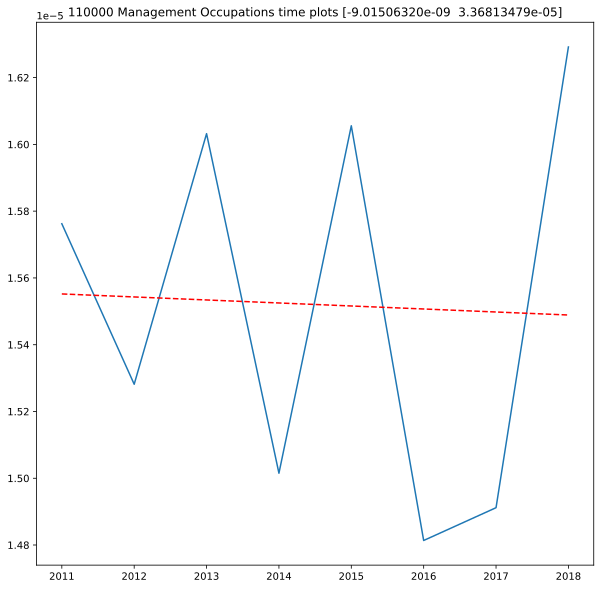

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_130000_Business_and_Financial_Operations_Occupations_time_plots_.png


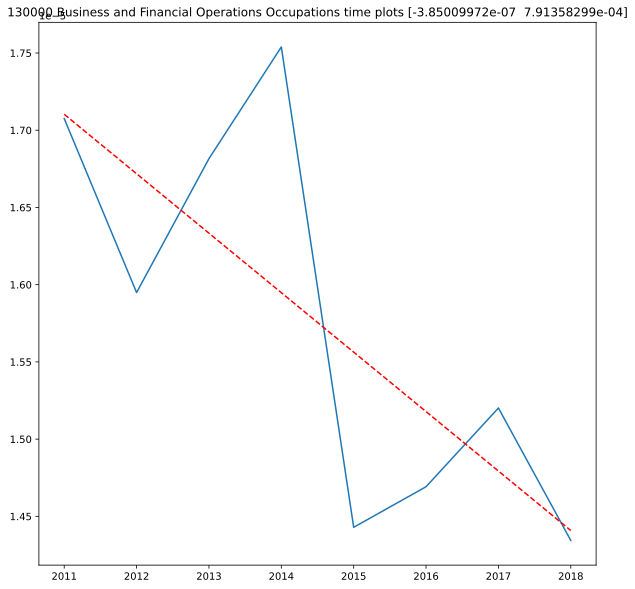

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_150000_Computer_and_Mathematical_Occupations_time_plots_.png


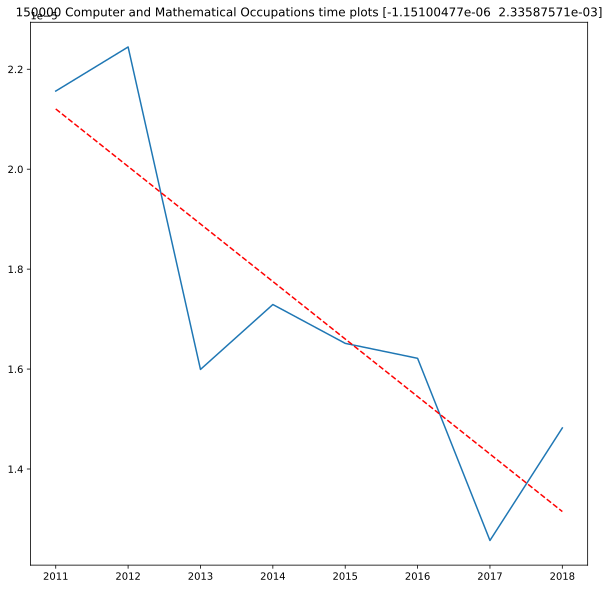

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_170000_Architecture_and_Engineering_Occupations_time_plots_.png


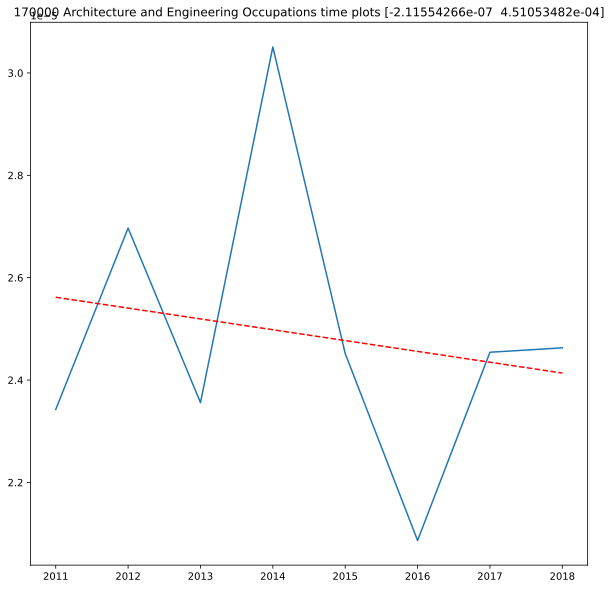

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_190000_Life_Physical_and_Social_Science_Occupations_time_plots_.png


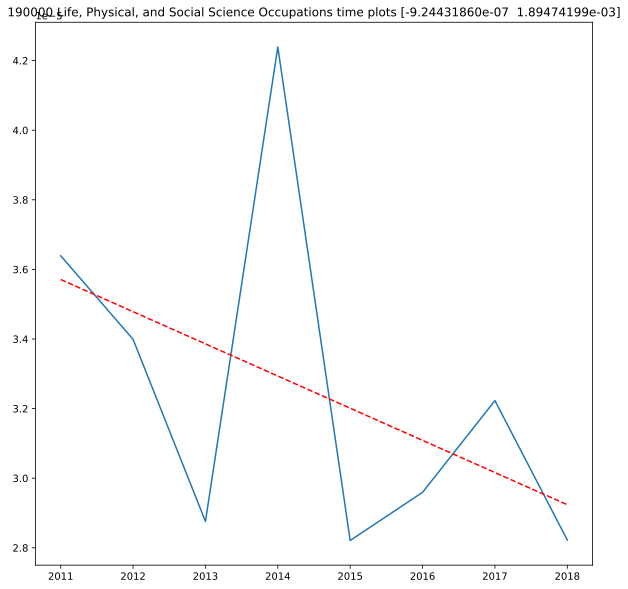

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_210000_Community_and_Social_Service_Occupations_time_plots_.png


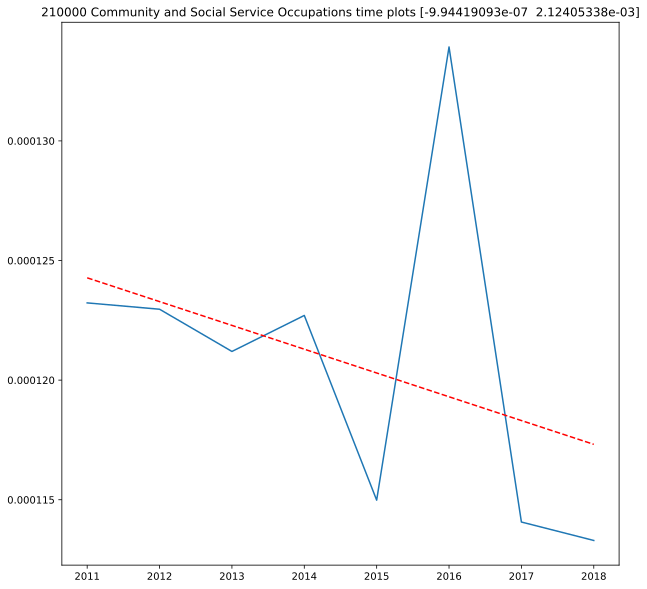

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_230000_Legal_Occupations_time_plots_.png


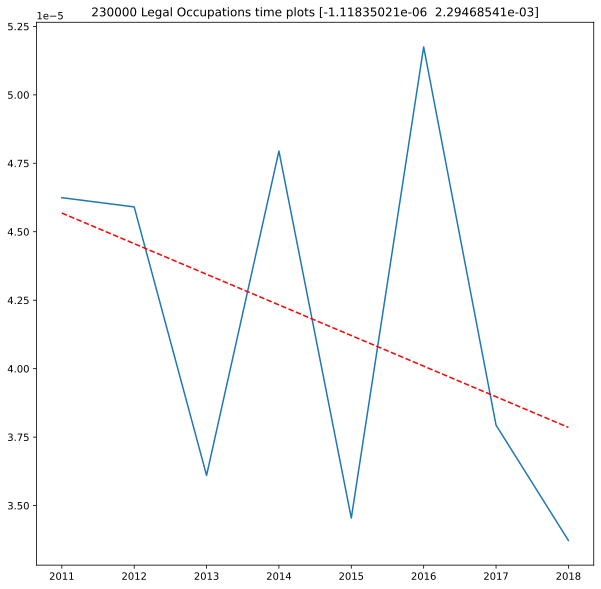

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


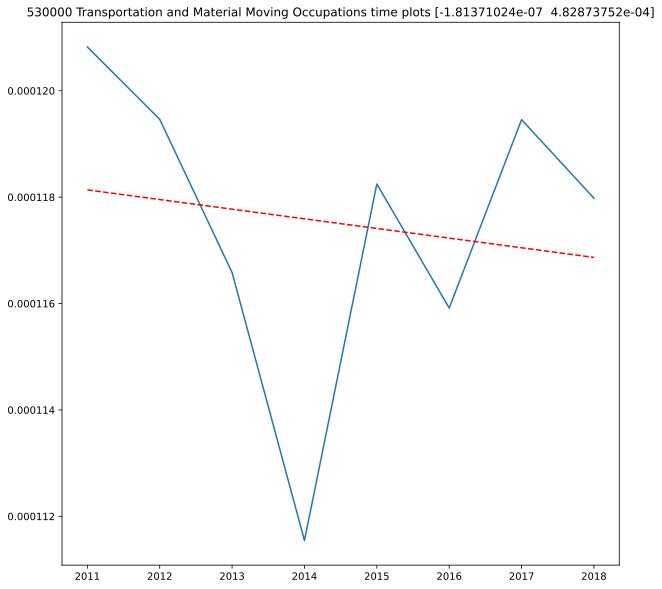

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_270000_Arts_Design_Entertainment_Sports_and_Media_Occupations_time_plots_.png


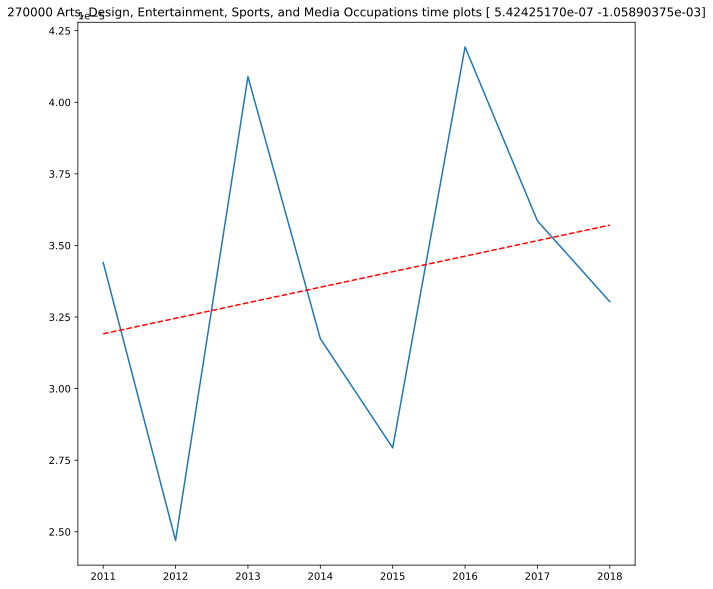

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_290000_Healthcare_Practitioners_and_Technical_Occupations_time_plots_.png


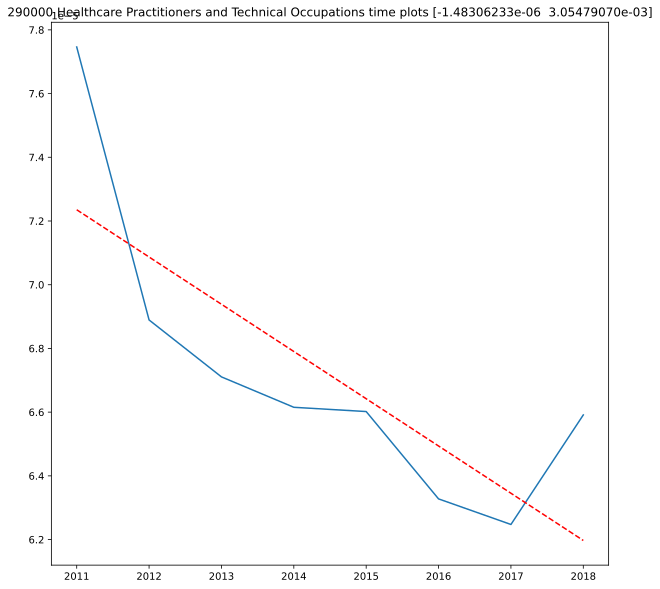

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_310000_Healthcare_Support_Occupations_time_plots_.png


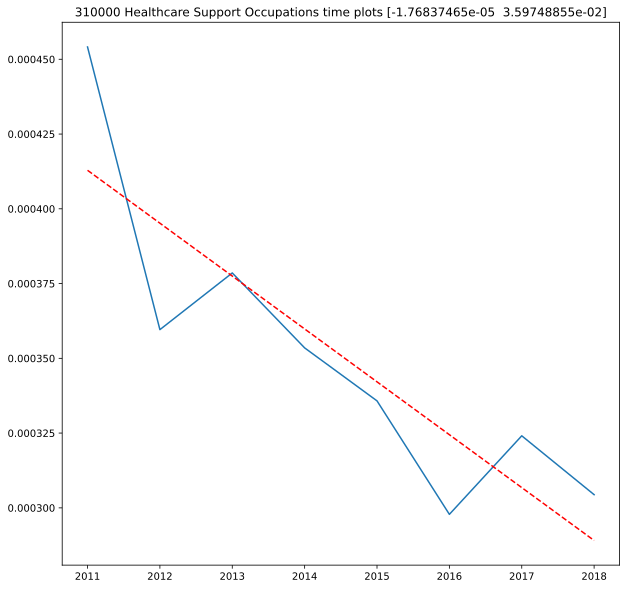

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_330000_Protective_Service_Occupations_time_plots_.png


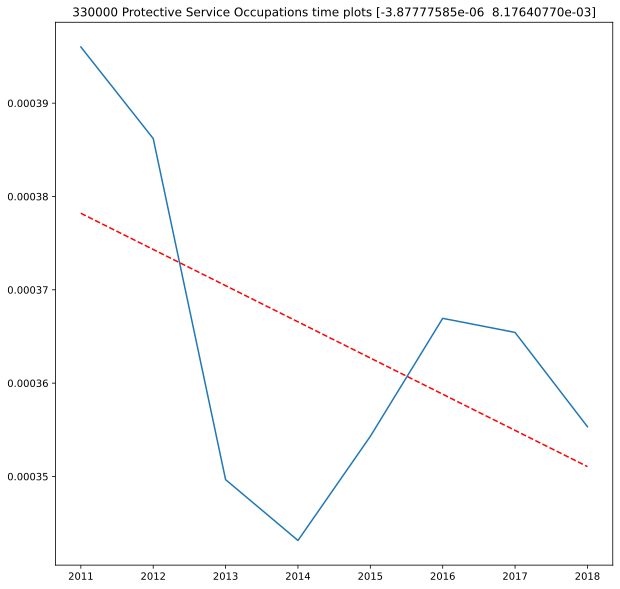

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


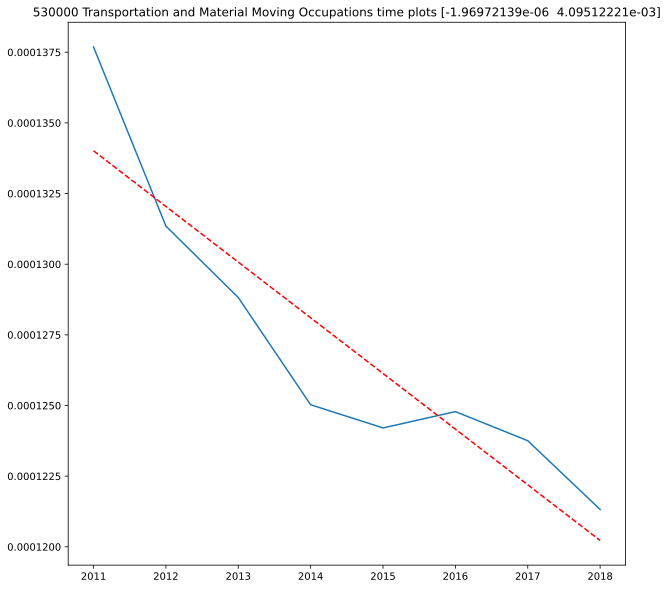

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_370000_Building_and_Grounds_Cleaning_and_Maintenance_Occupations_time_plots_.png


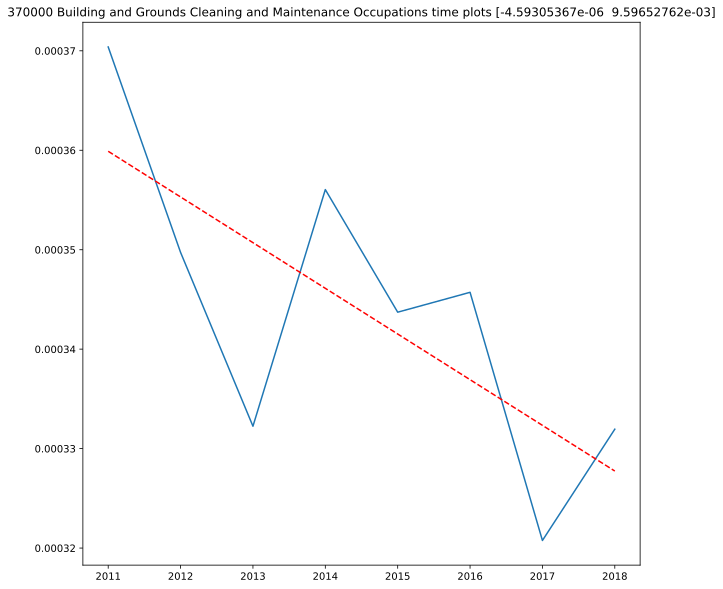

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_390000_Personal_Care_and_Service_Occupations_time_plots_.png


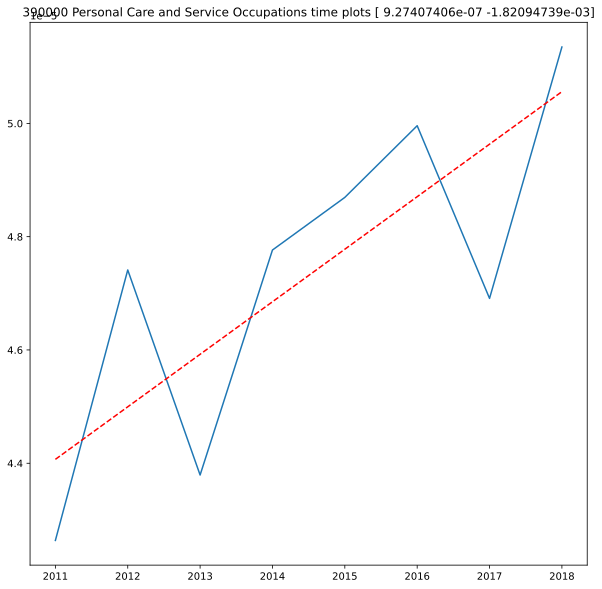

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_410000_Sales_and_Related_Occupations_time_plots_.png


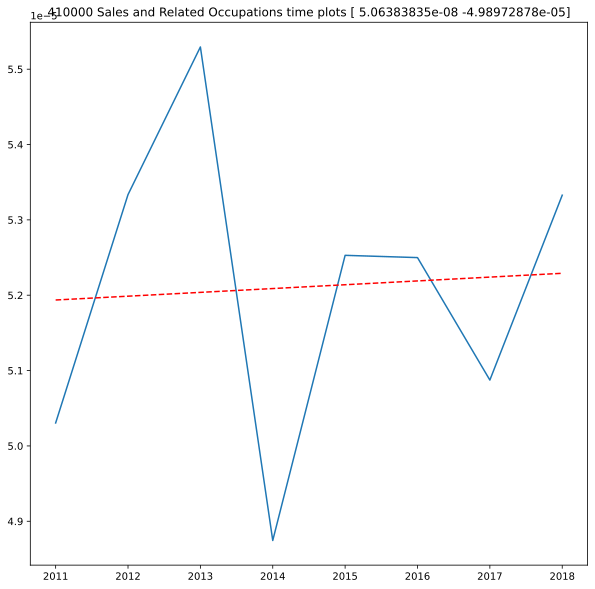

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_430000_Office_and_Administrative_Support_Occupations_time_plots_.png


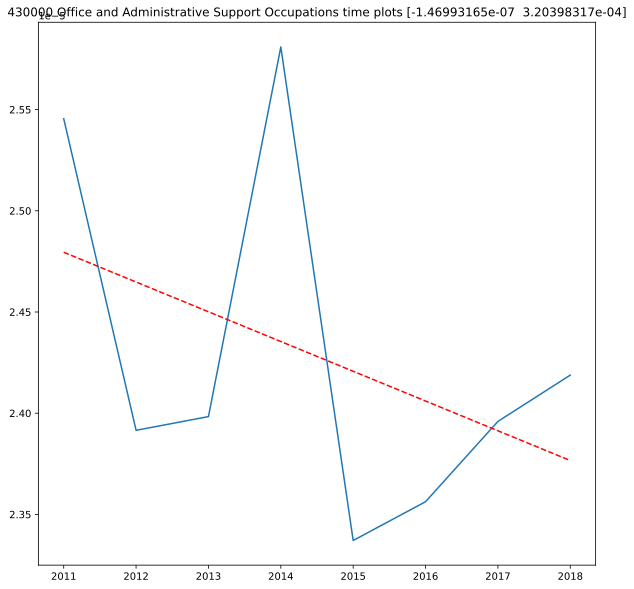

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


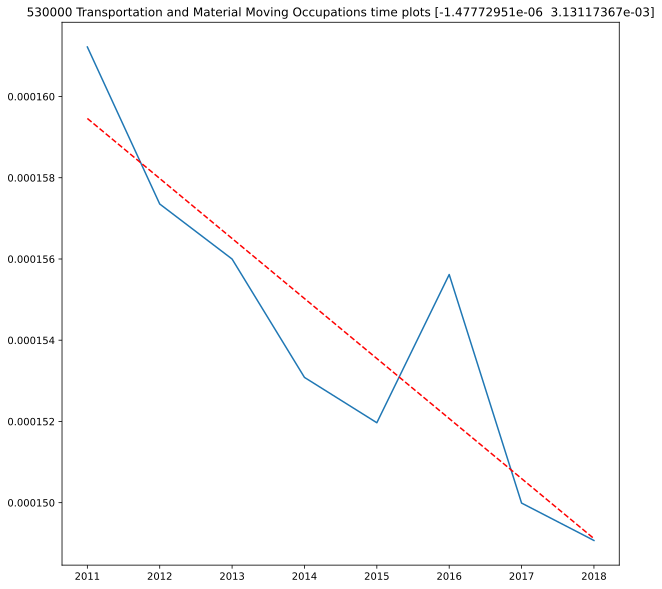

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_470000_Construction_and_Extraction_Occupations_time_plots_.png


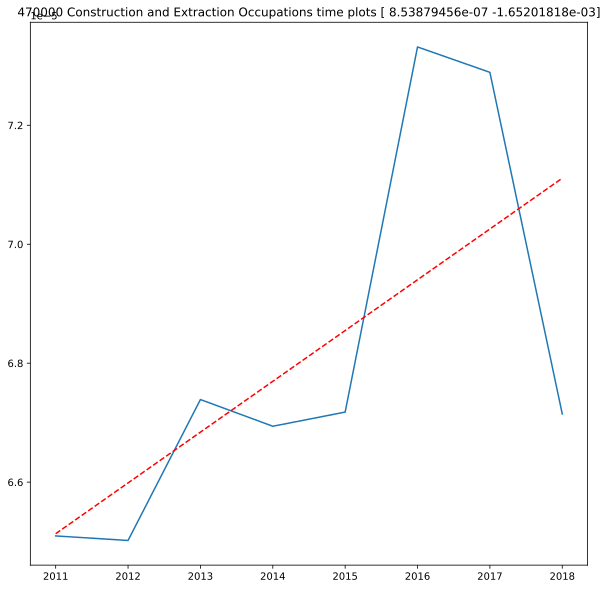

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_490000_Installation_Maintenance_and_Repair_Occupations_time_plots_.png


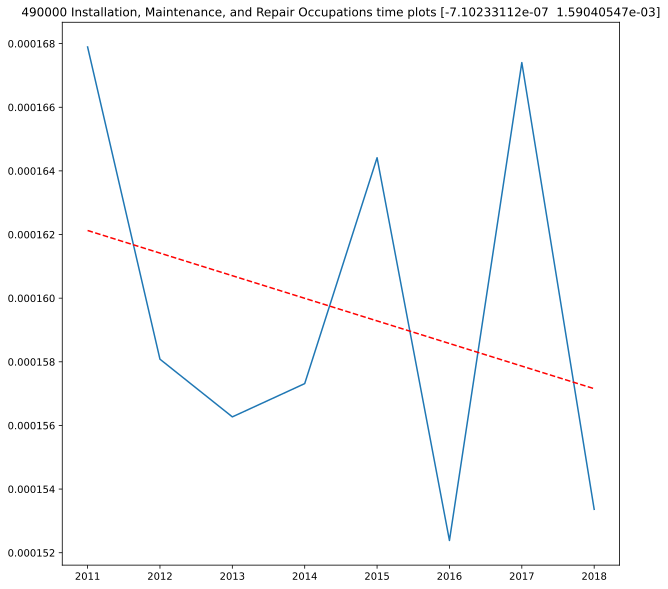

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_510000_Production_Occupations_time_plots_.png


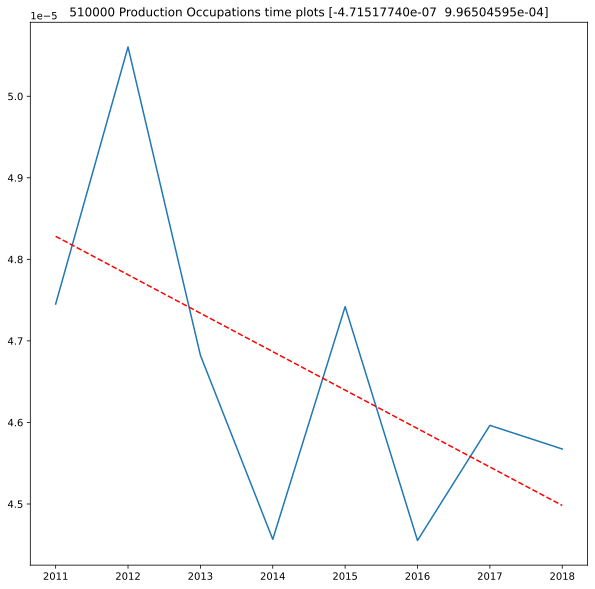

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


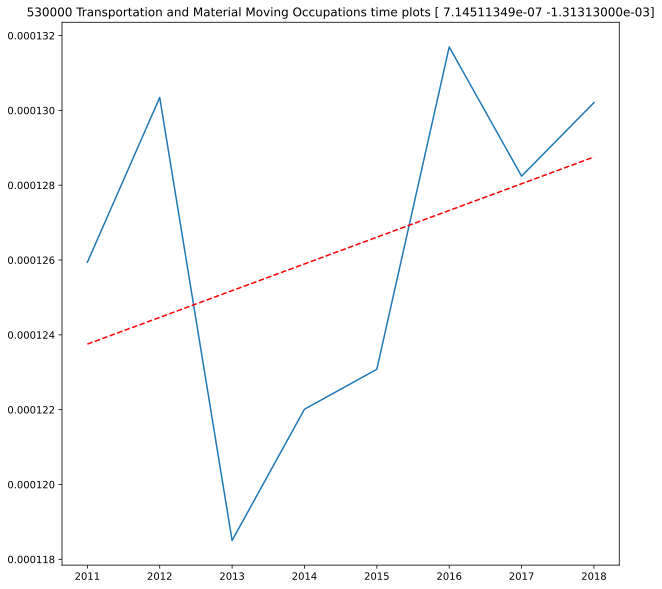

In [53]:
code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

#code_list =  ['_11', '_13' ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        
        if (len(tmp_lst) == 0):
            omean = 0.0
        else:
            omean = np.array(tmp_lst).mean()

        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    lines.append([use_case, popt])        
        
    #display(popt, pcov)
    
    for ri in range(0+2011,len(x)+2011):
        r.append(func(ri, *popt))
        #print(ri,r)
        
    plt.figure(figsize=(10, 10))
    
    plt.plot(x,y)
    plt.plot(x,r, 'r--')
    
    title = " time plots "
    
    plt.title(use_case + title + str(popt))    
    
    save_title = "../PLOTS/" + desired_file_output + use_case + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    print(save_title)
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    #plt.close()


In [54]:
for i in range(0,len(lines)):
    print(" y = {0: 1.8f} x + {1: 1.8f}  : {2} ".format(lines[i][1][0], lines[i][1][1], lines[i][0]))
    

 y = -0.00000001 x +  0.00003368  : 110000 Management Occupations 
 y = -0.00000039 x +  0.00079136  : 130000 Business and Financial Operations Occupations 
 y = -0.00000115 x +  0.00233588  : 150000 Computer and Mathematical Occupations 
 y = -0.00000021 x +  0.00045105  : 170000 Architecture and Engineering Occupations 
 y = -0.00000092 x +  0.00189474  : 190000 Life, Physical, and Social Science Occupations 
 y = -0.00000099 x +  0.00212405  : 210000 Community and Social Service Occupations 
 y = -0.00000112 x +  0.00229469  : 230000 Legal Occupations 
 y = -0.00000018 x +  0.00048287  : 530000 Transportation and Material Moving Occupations 
 y =  0.00000054 x + -0.00105890  : 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
 y = -0.00000148 x +  0.00305479  : 290000 Healthcare Practitioners and Technical Occupations 
 y = -0.00001768 x +  0.03597489  : 310000 Healthcare Support Occupations 
 y = -0.00000388 x +  0.00817641  : 330000 Protective Service Occupations 

# CALC COV 

In [55]:
cov_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)

print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    ostd  = np.array(y).std()
    ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case,ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
110000 Management Occupations 0.03517478611208998
130000 Business and Financial Operations Occupations 0.07535033539823728
150000 Computer and Mathematical Occupations 0.18010282914884554
170000 Architecture and Engineering Occupations 0.10664052385827984
190000 Life, Physical, and Social Science Occupations 0.1437840000347995
210000 Community and Social Service Occupations 0.05252996406473566
230000 Legal Occupations 0.15576312713519888
530000 Transportation and Material Moving Occupations 0.022979134283475203
270000 Arts, Design, Entertainment, Sports, and Media Occupations 0.16305601817236093
290000 Healthcare Practitioners and Technical Occupations 0.06449129192116455
310000 Healthcare Support Occupations 0.1329809800155221
330000 Protective Service Occupations 0.04686872836991227
530000 Transportation and Material Moving Occupat

In [56]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0229791 	 530000 Transportation and Material Moving Occupations 
0.0245395 	 530000 Transportation and Material Moving Occupations 
0.0338126 	 430000 Office and Administrative Support Occupations 
0.0347704 	 530000 Transportation and Material Moving Occupations 
0.0351748 	 110000 Management Occupations 
0.0358756 	 490000 Installation, Maintenance, and Repair Occupations 
0.0368898 	 410000 Sales and Related Occupations 
0.0389081 	 530000 Transportation and Material Moving Occupations 
0.0394421 	 510000 Production Occupations 
0.0424012 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.0441213 	 470000 Construction and Extraction Occupations 
0.0468687 	 330000 Protective Service Occupations 
0.0525300 	 210000 Community and Social Service Occupations 
0.0577995 	 390000 Personal Care and Service Occupations 
0.0644913 	 290000 Healthcare Practitioners and Technical Occupations 
0.0753503 	 130000 Business and Financial Operations Occupations 
0.1066405 	 170

# MEAN

In [57]:
mean_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    #ostd  = np.array(y).std()
    #ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case,omean)
    
    if (omean >= 0):
        mean_array.append([str(use_case),omean])

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
110000 Management Occupations 1.5520503036370825e-05
130000 Business and Financial Operations Occupations 1.5755709004232648e-05
150000 Computer and Mathematical Occupations 1.717659841569023e-05
170000 Architecture and Engineering Occupations 2.487741282486223e-05
190000 Life, Physical, and Social Science Occupations 3.247400360486239e-05
210000 Community and Social Service Occupations 0.0001207961138623036
230000 Legal Occupations 4.176892012946785e-05
530000 Transportation and Material Moving Occupations 0.00011750182416806389
270000 Arts, Design, Entertainment, Sports, and Media Occupations 3.381175888597128e-05
290000 Healthcare Practitioners and Technical Occupations 6.716163209271393e-05
310000 Healthcare Support Occupations 0.00035097818753243755
330000 Protective Service Occupations 0.0003646282458010522
530000 Transportatio

In [58]:
test_list = mean_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0000155 	 110000 Management Occupations 
0.0000158 	 130000 Business and Financial Operations Occupations 
0.0000172 	 150000 Computer and Mathematical Occupations 
0.0000243 	 430000 Office and Administrative Support Occupations 
0.0000249 	 170000 Architecture and Engineering Occupations 
0.0000325 	 190000 Life, Physical, and Social Science Occupations 
0.0000338 	 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0000418 	 230000 Legal Occupations 
0.0000466 	 510000 Production Occupations 
0.0000473 	 390000 Personal Care and Service Occupations 
0.0000521 	 410000 Sales and Related Occupations 
0.0000672 	 290000 Healthcare Practitioners and Technical Occupations 
0.0000681 	 470000 Construction and Extraction Occupations 
0.0001175 	 530000 Transportation and Material Moving Occupations 
0.0001208 	 210000 Community and Social Service Occupations 
0.0001263 	 530000 Transportation and Material Moving Occupations 
0.0001271 	 530000 Transportation and Materia

# COV LEVEL 3

In [60]:
code_list = []
soc_level = 3

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-5 + soc_level]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

['_1110', '_1120', '_1130', '_1131', '_1190', '_1191', '_1310', '_1311', '_1320', '_1511', '_1520', '_1720', '_1721', '_1730', '_1710', '_1920', '_1940', '_1910', '_1930', '_2110', '_2120', '_2320', '_2310', '_2510', '_2511', '_2520', '_2530', '_2540', '_2590', '_2710', '_2720', '_2740', '_2730', '_2910', '_2911', '_2920', '_2990', '_3110', '_3120', '_3190', '_3310', '_3320', '_3330', '_3390', '_3510', '_3520', '_3530', '_3590', '_3710', '_3720', '_3730', '_3910', '_3920', '_3930', '_3950', '_3960', '_3990', '_3940', '_3970', '_4110', '_4120', '_4130', '_4140', '_4190', '_4310', '_4320', '_4330', '_4340', '_4341', '_4350', '_4360', '_4390', '_4391', '_4351', '_4510', '_4520', '_4530', '_4540', '_4710', '_4720', '_4721', '_4722', '_4730', '_4740', '_4750', '_4910', '_4920', '_4930', '_4990', '_5110', '_5120', '_5130', '_5140', '_5141', '_5151', '_5160', '_5170', '_5180', '_5190', '_5191', '_5310', '_5320', '_5330', '_5340', '_5350', '_5360', '_5370', '_5371']


In [61]:
cov_array = []

lines     = []

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]

soc_level = 3

for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:(-5 + soc_level)] + ("0"*(5-soc_level)) + " " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
                   
    omean = np.array(y).mean()
    ostd  = np.array(y).std()
    ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case, ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])

111000 Management Occupations 0.17335682119185197
112000 Management Occupations 0.2502775193389566
113000 Management Occupations 0.09552062042503394
113100 Management Occupations 0.43075282019829425
119000 Management Occupations 0.08754776320400227
119100 Management Occupations 0.0841027123266332
131000 Business and Financial Operations Occupations 0.10407962285877856
131100 Business and Financial Operations Occupations 0.07618401591684039
132000 Business and Financial Operations Occupations 0.1891314172591281
151100 Computer and Mathematical Occupations 0.17873777809585908
152000 Computer and Mathematical Occupations 0.6374068069217722
172000 Architecture and Engineering Occupations 0.2745253554605303
172100 Architecture and Engineering Occupations 0.23883069408604257
173000 Architecture and Engineering Occupations 0.13520016359851328
171000 Architecture and Engineering Occupations 0.6099018301161482
192000 Life, Physical, and Social Science Occupations 0.44036714609634636
194000 Life

In [62]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0252408 	 292000 Healthcare Practitioners and Technical Occupations 
0.0275206 	 352000 Food Preparation and Serving Related Occupations 
0.0398005 	 513000 Production Occupations 
0.0422381 	 472000 Construction and Extraction Occupations 
0.0481763 	 533000 Transportation and Material Moving Occupations 
0.0512224 	 512000 Production Occupations 
0.0527479 	 532000 Transportation and Material Moving Occupations 
0.0549058 	 211000 Community and Social Service Occupations 
0.0552552 	 412000 Sales and Related Occupations 
0.0559716 	 515100 Production Occupations 
0.0569952 	 499000 Installation, Maintenance, and Repair Occupations 
0.0586576 	 493000 Installation, Maintenance, and Repair Occupations 
0.0596528 	 339000 Protective Service Occupations 
0.0597046 	 353000 Food Preparation and Serving Related Occupations 
0.0600579 	 372000 Building and Grounds Cleaning and Maintenance Occupations 
0.0646222 	 471000 Construction and Extraction Occupations 
0.0657124 	 435000 Office an

# VARIANCE ACROSS AGE

In [77]:
def get_case_list(soc_level, desired_case):
    code_list = []

    #soc_level = 1
    #desired_case = "16to19"

    global global_y_soc1
    
    for i in range(0,len(global_y_soc1)):
        ucase = str(global_y_soc1[i][0]).split('-')[0]
        #print(ucase)
        
        if (ucase.find("NO DATA FOUND") < 0):
            ocup    = "_" + desired_case + "_" + ucase[-6:-5 + soc_level]
            #print(ocup)
            if ocup not in code_list:
                code_list.append(ocup)
                #if (str(ocup[1:]).isnumeric()):
                #    code_list.append(ocup)
        
    #print(code_list)
    
    return(code_list)

In [79]:
#soc_level = 1
#desired_case = "16to19"
#
#get_case_list(soc_level, desired_case)

In [92]:
cases = ["16to19", "20to24", "25to34", "35to44", "45to54", "55to64", "65plus"]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)

    cov_array = []

    for i in range(0,len(code_list)):
      
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
        
                year = str(yr)
                case = global_y_soc1[j][0]
            
                #print(year,ocup, case)
        
                if (case.find(year) >= 0) and (case.find(ocup) >=0):
                    tmp =  global_y_soc1[j][0].split('-')
                    use_ocup = tmp[0][-6:(-5 + soc_level)] + ("0"*(5-soc_level)) + " " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
      
    
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        ostd  = np.array(y).std()
        ocov  = ostd/omean 
    
        if math.isnan(ocov):
            ocov = 0.0
        
        ocov_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        cov_array.append([str(ocov_case),ocov])
        
    mult_array.append([str(desired_case),cov_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(cov_array)):
        print("{0:1.7f} \t {1:} ".format(cov_array[i][1], str(cov_array[i][0]))) 

    print(" ")

0.8329450 	 16to19 110000 Management Occupations 
1.2915877 	 16to19 130000 Business and Financial Operations Occupations 
1.8559215 	 16to19 150000 Computer and Mathematical Occupations 
2.6457513 	 16to19 170000 Architecture and Engineering Occupations 
1.5600280 	 16to19 190000 Life, Physical, and Social Science Occupations 
0.4030051 	 16to19 210000 Community and Social Service Occupations 
0.0000000 	 16to19 210000 Community and Social Service Occupations 
0.2990883 	 16to19 250000 Educational Instruction and Library Occupations 
0.8166400 	 16to19 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.2794697 	 16to19 290000 Healthcare Practitioners and Technical Occupations 
0.1438501 	 16to19 310000 Healthcare Support Occupations 
0.1503122 	 16to19 330000 Protective Service Occupations 
0.0935531 	 16to19 350000 Food Preparation and Serving Related Occupations 
0.1848255 	 16to19 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.2641122 	 16to19

In [81]:
print(len(mult_array))

7


../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_Coef_by_AGE.png


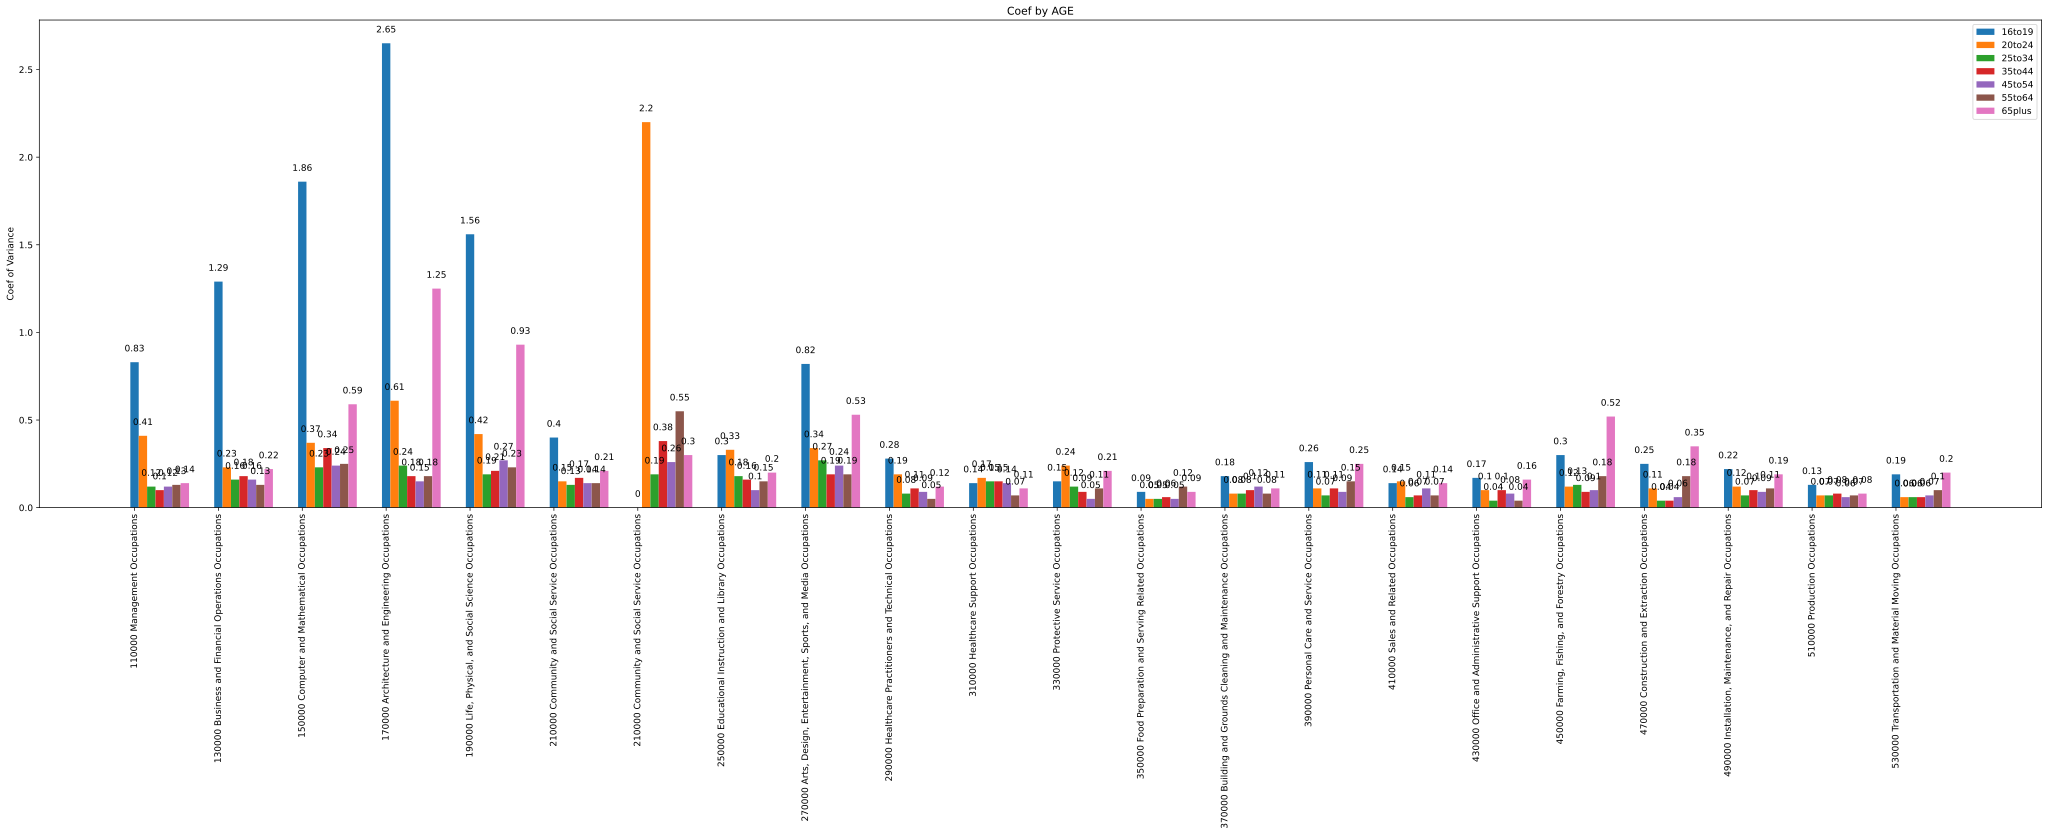

In [94]:
labels = []
for i in range(0,len(mult_array[0][1])):
    line = mult_array[0][1][i]
    larr = str(line[0]).split(" ")
    lbl  = ""
    for j in range(0,len(larr[1:])):
        lbl = lbl + " " + str(larr[1+j])
                              
    labels.append(lbl)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        val = round(val,2)
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(40, 10))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width/2), grpd[i], width/2, label=grpl[i])
    rects.append(tmp_rect)


title = "Coef by AGE"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coef of Variance')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 0.25)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()
    


# MEAN

In [96]:
cases = ["16to19", "20to24", "25to34", "35to44", "45to54", "55to64", "65plus"]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)

    mean_array = []

    for i in range(0,len(code_list)):
      
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
        
                year = str(yr)
                case = global_y_soc1[j][0]
            
                #print(year,ocup, case)
        
                if (case.find(year) >= 0) and (case.find(ocup) >=0):
                    tmp =  global_y_soc1[j][0].split('-')
                    use_ocup = tmp[0][-6:(-5 + soc_level)] + ("0"*(5-soc_level)) + " " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
      
    
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        #ostd  = np.array(y).std()
        #ocov  = ostd/omean 
    
        if math.isnan(omean):
            ocov = 0.0
        
        omean_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        mean_array.append([str(omean_case),omean])
        
    mult_array.append([str(desired_case),mean_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(mean_array)):
        print("{0:1.7f} \t {1:} ".format(mean_array[i][1], str(mean_array[i][0]))) 

    print(" ")

0.0000009 	 16to19 110000 Management Occupations 
0.0000019 	 16to19 130000 Business and Financial Operations Occupations 
0.0000015 	 16to19 150000 Computer and Mathematical Occupations 
0.0000008 	 16to19 170000 Architecture and Engineering Occupations 
0.0000328 	 16to19 190000 Life, Physical, and Social Science Occupations 
0.0000144 	 16to19 210000 Community and Social Service Occupations 
0.0000144 	 16to19 210000 Community and Social Service Occupations 
0.0000050 	 16to19 250000 Educational Instruction and Library Occupations 
0.0000154 	 16to19 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0000073 	 16to19 290000 Healthcare Practitioners and Technical Occupations 
0.0001090 	 16to19 310000 Healthcare Support Occupations 
0.0000506 	 16to19 330000 Protective Service Occupations 
0.0000799 	 16to19 350000 Food Preparation and Serving Related Occupations 
0.0000538 	 16to19 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.0000227 	 16to19

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_Mean_Injury_per_10000_by_AGE.png


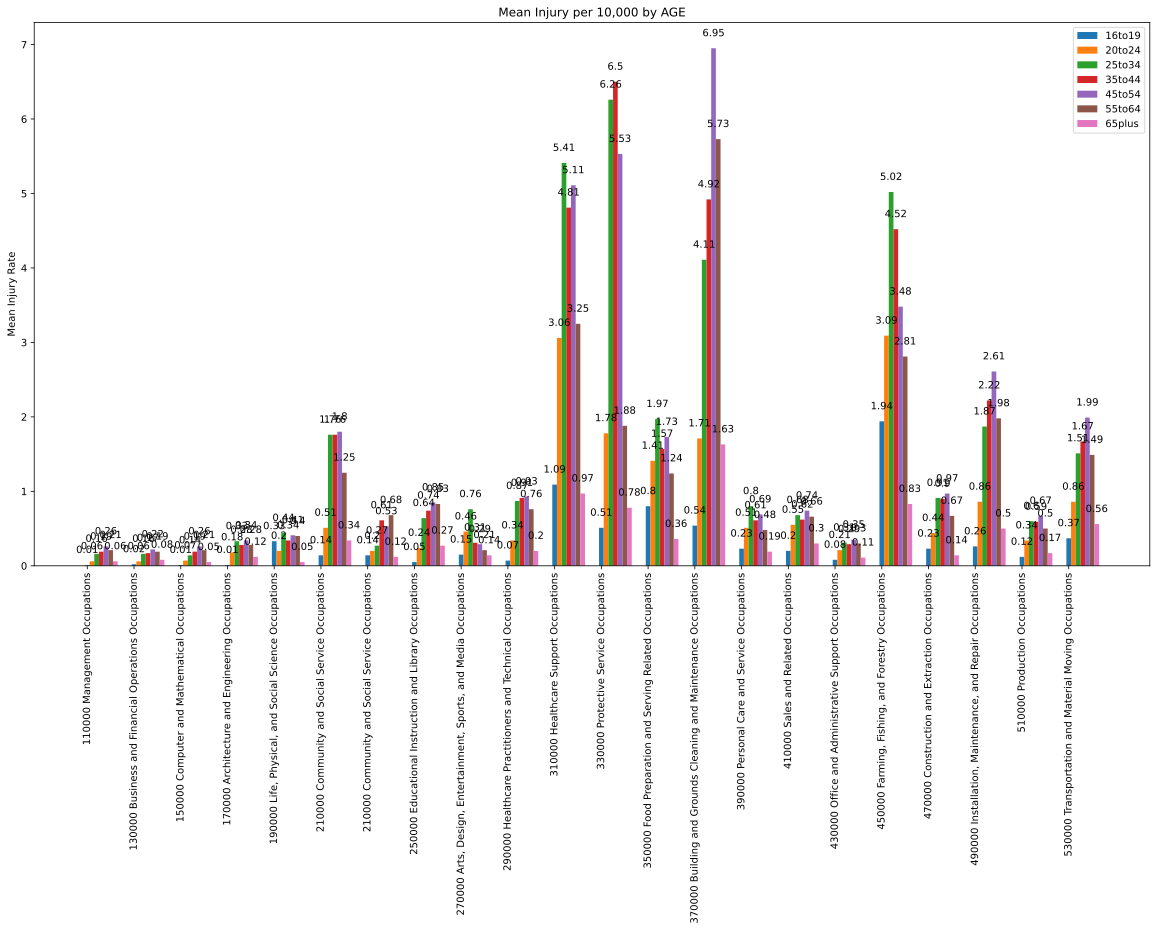

In [114]:
labels = []
for i in range(0,len(mult_array[0][1])):
    line = mult_array[0][1][i]
    larr = str(line[0]).split(" ")
    lbl  = ""
    for j in range(0,len(larr[1:])):
        lbl = lbl + " " + str(larr[1+j])
                              
    labels.append(lbl)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        
        val = round(10000*val,2)
        
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(20, 10))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width/2), grpd[i], width/2, label=grpl[i])
    rects.append(tmp_rect)

    
title = "Mean Injury per 10,000 by AGE"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Injury Rate')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 0.25)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()

